In [109]:
import os
import polars as pr
import librosa
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [47]:
directory=os.listdir('AudioWAV/')
print(len(directory))

7442


In [48]:
emotion= []
path= []
for audio_file in directory:
    if "ANG" in audio_file:
        emotion.append("Angry")
        path.append("AudioWAV/"+str(audio_file))
    if "HAP" in audio_file:
        emotion.append("Happy")
        path.append("AudioWAV/"+str(audio_file))
    if "SAD" in audio_file:
        emotion.append("Sad")
        path.append("AudioWAV/"+str(audio_file))
    if "FEA" in audio_file:
        emotion.append("Fear")
        path.append("AudioWAV/"+str(audio_file))
    if "DIS" in audio_file:
        emotion.append("Disgust")
        path.append("AudioWAV/"+str(audio_file))

In [49]:
df = pr.DataFrame([emotion, path], schema=["Emotion", "Path"])
print(df.head())

shape: (5, 2)
┌─────────┬──────────────────────────────┐
│ Emotion ┆ Path                         │
│ ---     ┆ ---                          │
│ str     ┆ str                          │
╞═════════╪══════════════════════════════╡
│ Angry   ┆ AudioWAV/1001_DFA_ANG_XX.wav │
│ Disgust ┆ AudioWAV/1001_DFA_DIS_XX.wav │
│ Fear    ┆ AudioWAV/1001_DFA_FEA_XX.wav │
│ Happy   ┆ AudioWAV/1001_DFA_HAP_XX.wav │
│ Sad     ┆ AudioWAV/1001_DFA_SAD_XX.wav │
└─────────┴──────────────────────────────┘


In [50]:
audio, sampling_rate = librosa.load('AudioWAV/1001_DFA_ANG_XX.wav' )
print(audio)
print(sampling_rate)

[ 6.9185524e-10  5.0900356e-10  5.6180405e-10 ... -6.0690268e-06
  2.2987717e-07  0.0000000e+00]
22050


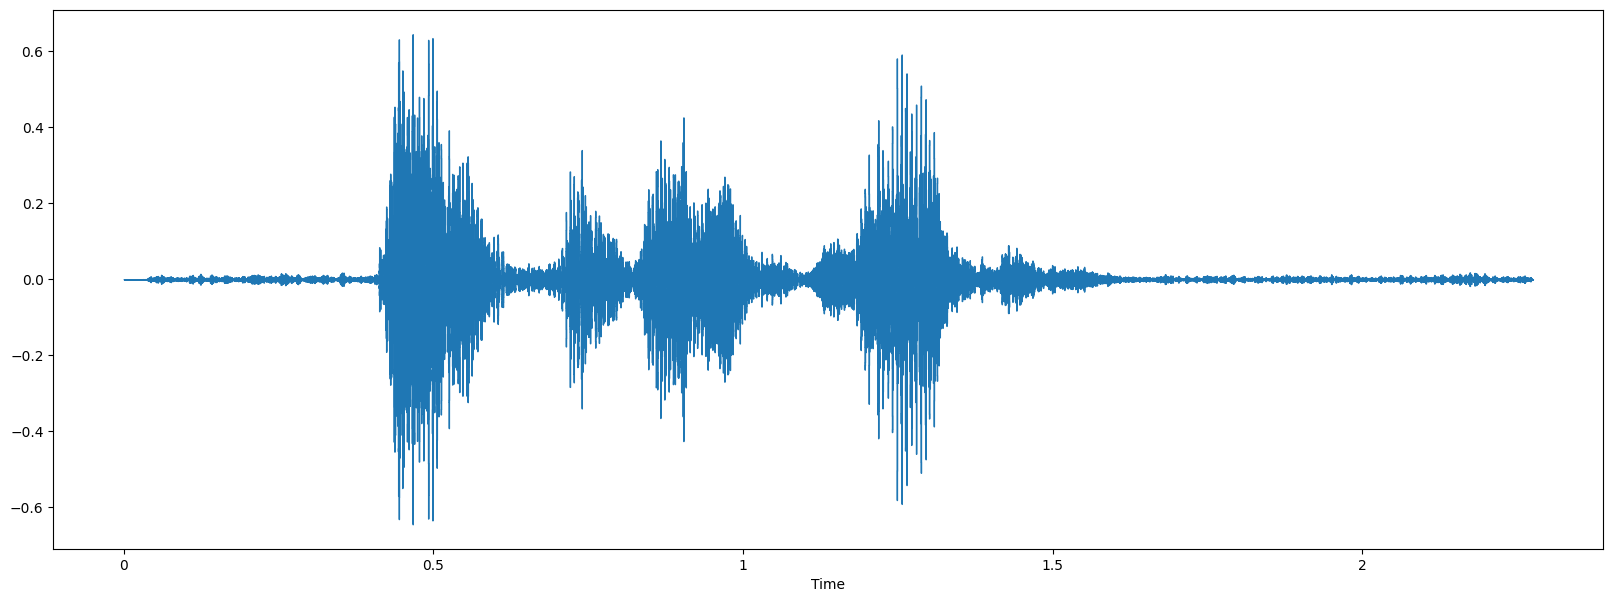

In [51]:
plt.figure(figsize=(20, 7))
librosa.display.waveshow(audio, sr=sampling_rate)

In [52]:
file='AudioWAV/1001_DFA_ANG_XX.wav'

In [119]:
def feature_MFCC_Delta(file_path):
    audio_file=file_path
    audio, sample_rate=librosa.load(audio_file)
    mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate,n_mfcc=25)
    delta_mfcc = librosa.feature.delta(mfcc)
    mfcc_delta = np.concatenate((mfcc, delta_mfcc), axis=0)
    spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sample_rate)
    return mfcc, mfcc_delta
feature_MFCC_Delta(file)

array([[-6.20808838e+02, -5.45379822e+02, -4.91683746e+02, ...,
        -4.71647888e+02, -4.75757355e+02, -5.12116028e+02],
       [ 2.26857662e-01,  8.52582092e+01,  1.11604515e+02, ...,
         1.14039131e+02,  1.14149475e+02,  1.02011078e+02],
       [ 2.23987147e-01,  4.34561844e+01,  3.41577225e+01, ...,
         2.59717712e+01,  2.75286655e+01,  3.33677750e+01],
       ...,
       [ 6.12197332e-02,  6.12197332e-02,  6.12197332e-02, ...,
         4.35211897e-01,  4.35211897e-01,  4.35211897e-01],
       [-5.87653160e-01, -5.87653160e-01, -5.87653160e-01, ...,
        -2.27385402e-01, -2.27385402e-01, -2.27385402e-01],
       [-9.46080148e-01, -9.46080148e-01, -9.46080148e-01, ...,
         1.36886910e-01,  1.36886910e-01,  1.36886910e-01]], dtype=float32)

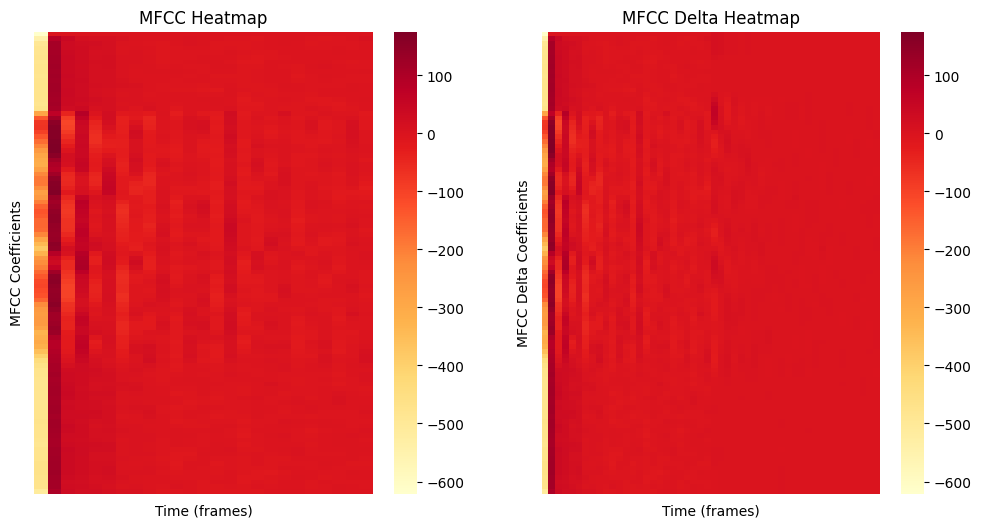

In [89]:
mfcc_matrix, mfcc_delta_matrix = feature_MFCC_Delta(file)
mfcc_df = pr.DataFrame(mfcc_matrix)
mfcc_delta_df = pr.DataFrame(mfcc_delta_matrix)

fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
sns.heatmap(mfcc_df, cmap='YlOrRd', xticklabels=False, yticklabels=False, ax=axs[0])
axs[0].set_title('MFCC Heatmap')
axs[0].set_xlabel('Time (frames)')
axs[0].set_ylabel('MFCC Coefficients')
sns.heatmap(mfcc_delta_df, cmap='YlOrRd', xticklabels=False, yticklabels=False, ax=axs[1])
axs[1].set_title('MFCC Delta Heatmap')
axs[1].set_xlabel('Time (frames)')
axs[1].set_ylabel('MFCC Delta Coefficients')
plt.show()

In [90]:
def feature_spectral_contrast(file_path):
    audio_file=file_path
    audio, sample_rate=librosa.load(audio_file)
    spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sample_rate)
    return spectral_contrast
feature_spectral_contrast(file)

array([[ 1.79983603, 10.97054123, 16.20373767, 21.20476088, 15.84436071,
        20.00846979, 20.12334425, 24.14892956, 19.98696753, 19.64190757,
        22.41582541, 26.17173944, 23.27824385, 23.97199353, 20.08122615,
        19.00533622, 16.67249943, 15.53295882, 19.61904119, 17.48299842,
        27.81145544, 26.65352245, 24.62286376, 28.40061381, 29.07878154,
        25.57387864, 22.76966149, 22.51755168, 22.27203439, 17.79523204,
        22.53409391, 26.22623344, 25.3538002 , 28.57115154, 34.4936068 ,
        19.9051603 , 17.92059104, 20.08705829, 28.59598149, 23.86889302,
        19.98088978, 26.70084866, 14.11328528, 14.22019914, 48.38652138,
        32.41405826, 25.52038631, 21.8583044 , 10.73277541, 14.72373084,
        19.41783493, 23.38383739, 24.5526464 , 20.21928307, 16.73743505,
        25.09193166, 17.12594741, 17.12281127, 25.04561265, 20.15860595,
        19.26484755, 23.96996107, 19.20921931, 15.33290754, 21.22075561,
        28.70232647, 15.08067958, 20.27999062, 13.5

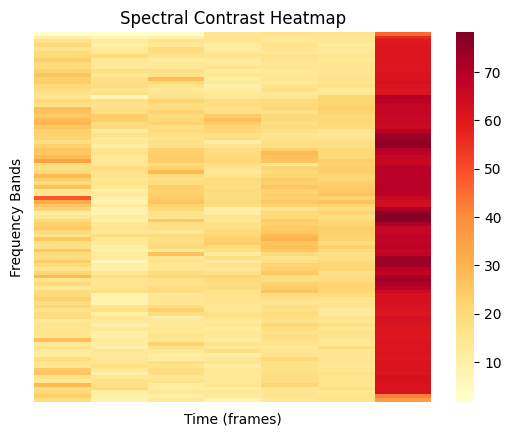

In [91]:
spectral_contrast_matrix = feature_spectral_contrast(file)
spec_df = pr.DataFrame(spectral_contrast_matrix)

sns.heatmap(spec_df, cmap='YlOrRd', xticklabels=False, yticklabels=False)
plt.title('Spectral Contrast Heatmap')
plt.xlabel('Time (frames)')
plt.ylabel('Frequency Bands')
plt.show()

In [104]:
def feature_chroma(file_path):
    audio_file=file_path
    audio, sample_rate=librosa.load(audio_file)
    chroma = librosa.feature.chroma_stft(y=audio, sr=sample_rate)
    return chroma
feature_chroma(file)

array([[0.9451095 , 0.6301432 , 0.93406516, ..., 0.6532686 , 0.31170872,
        0.29859236],
       [1.        , 0.62130487, 0.7646631 , ..., 1.        , 0.48171794,
        0.297193  ],
       [0.94644004, 0.49104398, 0.3263957 , ..., 0.8799419 , 0.46401507,
        0.5853447 ],
       ...,
       [0.7113316 , 0.94082415, 0.90118665, ..., 0.74669933, 0.40748903,
        0.37085882],
       [0.6180813 , 1.        , 0.9713478 , ..., 0.5701781 , 0.2832043 ,
        0.18461253],
       [0.71849334, 0.7846246 , 1.        , ..., 0.28886575, 0.1433925 ,
        0.25357005]], dtype=float32)

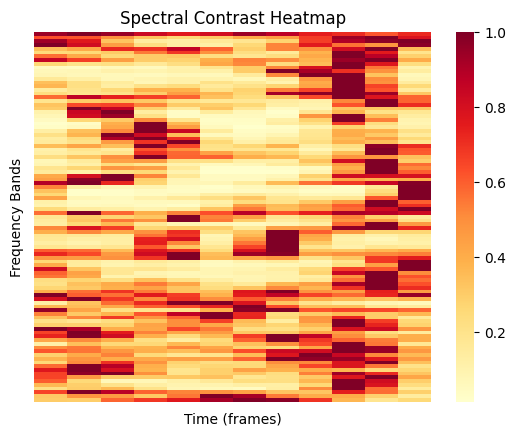

In [102]:
chroma_matrix = feature_chroma(file)
chroma_df = pr.DataFrame(chroma_matrix)

sns.heatmap(chroma_df, cmap='YlOrRd', xticklabels=False, yticklabels=False)
plt.title('Spectral Contrast Heatmap')
plt.xlabel('Time (frames)')
plt.ylabel('Frequency Bands')
plt.show()

In [94]:
def feature_zero_crossing(file_path):
    audio_file=file_path
    audio, sample_rate=librosa.load(audio_file)
    zero_crossing = librosa.feature.zero_crossing_rate(y=audio)
    return zero_crossing

feature_zero_crossing(file)

array([[0.15966797, 0.16748047, 0.17382812, 0.09814453, 0.03125   ,
        0.03076172, 0.03222656, 0.02978516, 0.02832031, 0.02636719,
        0.02441406, 0.02490234, 0.02929688, 0.03125   , 0.03271484,
        0.02929688, 0.05078125, 0.07568359, 0.10302734, 0.12011719,
        0.10595703, 0.08789062, 0.06494141, 0.05078125, 0.04394531,
        0.04150391, 0.05761719, 0.08105469, 0.125     , 0.1484375 ,
        0.13818359, 0.13183594, 0.09130859, 0.06835938, 0.07080078,
        0.07421875, 0.08691406, 0.09863281, 0.10009766, 0.09179688,
        0.08740234, 0.0859375 , 0.08496094, 0.08203125, 0.06640625,
        0.05224609, 0.08007812, 0.15771484, 0.22363281, 0.26611328,
        0.23681641, 0.17041016, 0.125     , 0.10400391, 0.11523438,
        0.11865234, 0.12011719, 0.11816406, 0.12451172, 0.13427734,
        0.12304688, 0.11914062, 0.10595703, 0.08251953, 0.11035156,
        0.13867188, 0.15966797, 0.16748047, 0.15039062, 0.10791016,
        0.07373047, 0.05419922, 0.03808594, 0.03

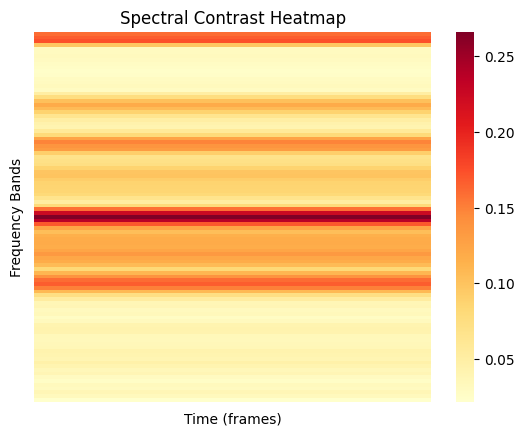

In [95]:
zero_crossing_matrix = feature_zero_crossing(file)
zero_crossing_df = pr.DataFrame(zero_crossing_matrix)

sns.heatmap(zero_crossing_df, cmap='YlOrRd', xticklabels=False, yticklabels=False)
plt.title('Spectral Contrast Heatmap')
plt.xlabel('Time (frames)')
plt.ylabel('Frequency Bands')
plt.show()

In [125]:
def feature_concat(file):
    mfcc_delta=feature_MFCC_Delta(file)[1]
    zero_crossing=feature_zero_crossing(file)
    chroma=feature_chroma(file)
    spectral_contrast=feature_spectral_contrast(file)
    print(zero_crossing)
    print("============")
    scaler = StandardScaler()
    mfcc_delta = scaler.fit_transform(mfcc_delta)
    chroma = scaler.fit_transform(chroma)
    spectral_contrast = scaler.fit_transform(spectral_contrast)
    zero_crossing = scaler.fit_transform(zero_crossing)
    print(zero_crossing)
    features = np.concatenate((mfcc_delta, spectral_contrast, chroma, zero_crossing), axis=0)
    
feature_concat(file)


[[0.15966797 0.16748047 0.17382812 0.09814453 0.03125    0.03076172
  0.03222656 0.02978516 0.02832031 0.02636719 0.02441406 0.02490234
  0.02929688 0.03125    0.03271484 0.02929688 0.05078125 0.07568359
  0.10302734 0.12011719 0.10595703 0.08789062 0.06494141 0.05078125
  0.04394531 0.04150391 0.05761719 0.08105469 0.125      0.1484375
  0.13818359 0.13183594 0.09130859 0.06835938 0.07080078 0.07421875
  0.08691406 0.09863281 0.10009766 0.09179688 0.08740234 0.0859375
  0.08496094 0.08203125 0.06640625 0.05224609 0.08007812 0.15771484
  0.22363281 0.26611328 0.23681641 0.17041016 0.125      0.10400391
  0.11523438 0.11865234 0.12011719 0.11816406 0.12451172 0.13427734
  0.12304688 0.11914062 0.10595703 0.08251953 0.11035156 0.13867188
  0.15966797 0.16748047 0.15039062 0.10791016 0.07373047 0.05419922
  0.03808594 0.03857422 0.03222656 0.03369141 0.02832031 0.03222656
  0.04150391 0.04296875 0.04248047 0.03515625 0.03417969 0.03613281
  0.03662109 0.04345703 0.04199219 0.03955078 0.04